<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [57]:
# librerias

import pandas as pd
import numpy as np
import scipy.stats as stats

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt

In [3]:
# datos
cats = pd.read_csv("data/cookie_cats.csv")
cats.head()


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
control = cats[cats["version"] == "gate_30"]
test = cats[cats["version"] == "gate_40"]

In [6]:
# retención a 1 día para cada grupo

retencion_control = control["retention_1"].mean()

retencion_test = test["retention_1"].mean()

retencion_control, retencion_test

(0.4481879194630872, 0.44228274967574577)

In [8]:
# retención a 7 días para cada grupo

retencion7_control = control["retention_7"].mean()

retention7_test = test["retention_7"].mean()

retencion7_control, retention7_test

(0.19020134228187918, 0.18200004396667327)

En el contexto del enfoque bayesiano, representar una distribución uniforme implica asignar una priori en la que no tenemos preferencia o información previa sobre los posibles valores de la variable en estudio. No tenemos razones para creer que un valor específico es más probable que otro, por lo que asignamos a cada valor dentro de un rango igual probabilidad de ocurrencia.

In [10]:
# priori para el grupo de control
priori_control = {'alpha': 1, 'beta': 1}

# priori para el grupo de tratamiento
priori_test = {'alpha': 1, 'beta': 1}

Calcular las distribuciones posteriores para cada grupo:
Utilizamos la distribución beta para calcular las distribuciones a posteriori para el grupo de control y el grupo de tratamiento.

Creamos una distribución posterior actualizando los prioris con los datos observados para cada grupo.

In [19]:
from scipy.stats import beta

#  distribución beta para calcular las distribuciones a posteriori para el grupo de control

posterior_control = beta(control["retention_1"].sum() + priori_control['alpha'], # obtener la suma de los valores de retención positivos en el grupo de control.
                         #Priori alpha y beta empiezan desde 1
                         
                         len(control) - control["retention_1"].sum() + priori_control['beta']) #Usamos len(control_group) para obtener el tamaño de la muestra del grupo de control.

# agregamos los valores de retención positivos y el alpha de la priori a la suma de alpha. Restamos la suma de los valores de retención positivos al tamaño de la muestra y agregamos el beta de la prior a la suma de beta.

In [20]:
 #  Utilizamos la distribución beta para calcular las distribuciones a posteriori para el grupo de tratamiento.

posterior_test = beta(test["retention_1"].sum() + priori_test['alpha'],
                           len(test) - test["retention_1"].sum() + priori_test['beta'])


In [22]:
cats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [28]:
# transformacion

samples_control = posterior_control.rvs(10000)
samples_treatment = posterior_test.rvs(10000)

difference = samples_treatment - samples_control

p_value = (difference > 0).mean()

p_value


0.0357

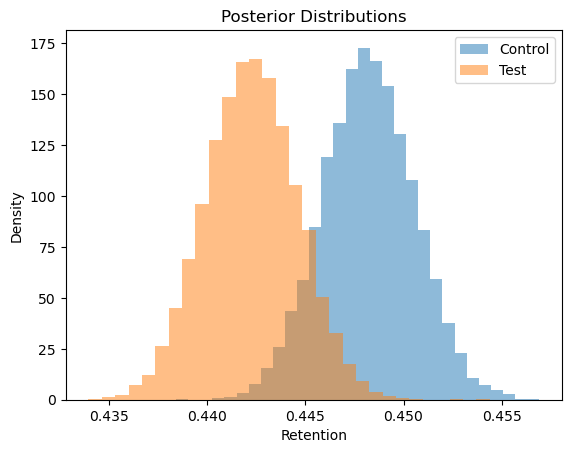

In [30]:
# Graficar distribución del grupo de control
plt.hist(samples_control, bins=30, density=True, alpha=0.5, label='Control')

# Graficar distribución del grupo de tratamiento
plt.hist(samples_treatment, bins=30, density=True, alpha=0.5, label='Test')

# Configurar etiquetas y título del gráfico
plt.xlabel('Retention')
plt.ylabel('Density')
plt.title('Posterior Distributions')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
print (CR_ctrl, CR_test)
plot([beta_C, beta_T], ['Control', 'Test'], lsup=0.006)

In [4]:
# testeo para retention_1


In [100]:
# testeo para retention_7

posterior_control_7 = beta(control["retention_7"].sum() + priori_control['alpha'], # obtener la suma de los valores de retención positivos en el grupo de control.
                         #Priori alpha y beta empiezan desde 1
                         
                         len(control) - control["retention_7"].sum() + priori_control['beta'])

posterior_test_7 = beta(test["retention_7"].sum() + priori_test['alpha'],
                           len(test) - test["retention_7"].sum() + priori_test['beta'])


In [101]:
samples_control_7 = posterior_control_7.rvs(10000)
samples_treatment_7 = posterior_test_7.rvs(10000)

difference = samples_treatment_7 - samples_control_7

p_value_7 = (difference > 0).mean()

p_value_7

0.0006

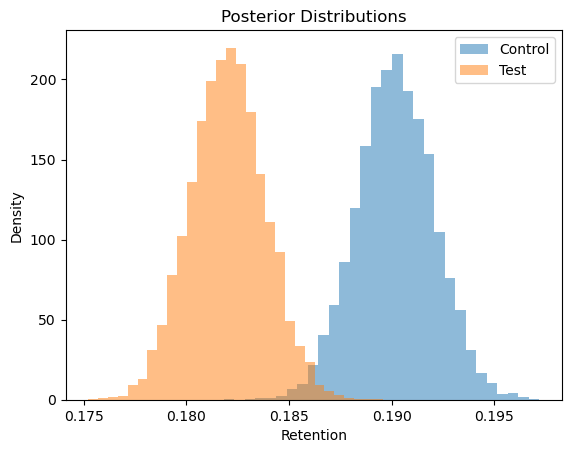

In [102]:
# Graficar distribución del grupo de control
plt.hist(samples_control_7, bins=30, density=True, alpha=0.5, label='Control')

# Graficar distribución del grupo de tratamiento
plt.hist(samples_treatment_7, bins=30, density=True, alpha=0.5, label='Test')

# Configurar etiquetas y título del gráfico
plt.xlabel('Retention')
plt.ylabel('Density')
plt.title('Posterior Distributions')
plt.legend()

# Mostrar el gráfico
plt.show()

In [31]:
cats.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [40]:
sum(cats['retention_1'].astype(str) == 'True')
sum(cats['retention_7'].astype(str) == 'True')

16781

In [42]:
sum(cats['retention_1'].astype(str) == 'True')

40153

In [43]:
sum(cats['retention_7'].astype(str) == 'True')

16781

In [55]:
control_A = control[control['retention_1'] == True]

tratamiento_A = test[test['retention_1']== True]

ab_test=pd.concat([control_A, tratamiento_A], axis=0)

ab_test.reset_index(drop=True, inplace=True)

ab_test.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,337,gate_30,38,True,False
1,2179,gate_30,39,True,False
2,2218,gate_30,305,True,True
3,2382,gate_30,73,True,False
4,2392,gate_30,14,True,False


In [94]:
# seleccionar grupos

control_res= control['retention_1'] == True
trat_res = test['retention_1'] == True

In [82]:
control_res

0        False
1         True
6        False
11       False
13        True
         ...  
90179     True
90180    False
90182     True
90183    False
90186     True
Name: retention_1, Length: 44700, dtype: bool

In [96]:
len(control_res)


44700

In [92]:
len(test_res)

45489

In [95]:
impresiones=[44700, 45489]  # count  , impresiones
    
conversiones=[control_res.sum(), trat_res.sum()]    # conversiones


z_score, p_value = proportions_ztest(conversiones, nobs=impresiones)

(control_a, trata_a), (control_b, trata_b) = proportion_confint(conversiones, 
                                                                nobs=impresiones,
                                                                alpha=0.05)

In [97]:
print(f'z-score: {z_score:.2f}')

print(f'p-valor: {p_value:.3f}')

print(f'intervalo conf 95% para grupo control: [{control_a:.3f}, {control_b:.3f}]')

print(f'intervalo conf 95% para grupo tratamiento: [{trata_a:.3f}, {trata_b:.3f}]')

z-score: 1.78
p-valor: 0.074
intervalo conf 95% para grupo control: [0.444, 0.453]
intervalo conf 95% para grupo tratamiento: [0.438, 0.447]


In [103]:
control_B = control[control['retention_7'] == True]

tratamiento_B = test[test['retention_7']== True]

ab_test_B=pd.concat([control_B, tratamiento_B], axis=0)

ab_test_B.reset_index(drop=True, inplace=True)

ab_test_B.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,2218,gate_30,305,True,True
1,2451,gate_30,204,True,True
2,2482,gate_30,108,True,True
3,2729,gate_30,105,False,True
4,4929,gate_30,386,True,True


In [104]:

control_res_B= control['retention_7'] == True
trat_res_B = test['retention_7'] == True

In [105]:
len(control_res_B)

44700

In [107]:
len(trat_res_B)

45489

In [108]:
impresiones=[44700, 45489]  # count  , impresiones
    
conversiones=[control_res_B.sum(), trat_res_B.sum()]    # conversiones


z_score, p_value = proportions_ztest(conversiones, nobs=impresiones)

(control_b, trata_b), (control_c, trata_c) = proportion_confint(conversiones, 
                                                                nobs=impresiones,
                                                                alpha=0.05)

In [109]:
print(f'z-score: {z_score:.2f}')

print(f'p-valor: {p_value:.3f}')

print(f'intervalo conf 95% para grupo control: [{control_b:.3f}, {control_c:.3f}]')

print(f'intervalo conf 95% para grupo tratamiento: [{trata_b:.3f}, {trata_c:.3f}]')

z-score: 3.16
p-valor: 0.002
intervalo conf 95% para grupo control: [0.187, 0.194]
intervalo conf 95% para grupo tratamiento: [0.178, 0.186]


In [ ]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.